In [184]:
import numpy as np

import tensorflow_probability as tfp
tfd = tfp.distributions

from tensorflow.keras.metrics import Mean

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# K-Armed bandit problem

## Stationary case

We have 10 different stationary distributions (arms). We build an agent whose task is to find the highest-paying arm.

In [190]:
# Generate arms randomly
N_BANDITS = 10

bandits = []

for i in range(N_BANDITS):
    mean = np.random.uniform(1, 30, 1).round().astype(float)[0]
    sd = np.random.uniform(1, 20, 1).round().astype(float)[0]
    bandits.append(tfd.Normal(loc=mean, scale=sd))

### Exploit strategy 

There's one round of exploration and then we apply pure exploitation.

In [191]:
N_TRIALS = 100

rewards = []
trials = []

initial_phase = True

for i in tqdm(range(N_TRIALS)):
    
    # Explore
    if initial_phase:
        for b in range(len(bandits)):
            rewards.append(Mean())
            result = bandits[b].sample()
            rewards[b](result)
            trials.append(b)
        initial_phase = False
            
    # Exploit
    else:
        b = np.argmax([r.result().numpy() for r in rewards])
        result = bandits[b].sample()
        rewards[b](result)
        trials.append(b)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 230.71it/s]


In [192]:
for b in range(len(bandits)):
    print(f'Bandit {b}: mu = {bandits[b].loc.numpy()}, sigma = {bandits[b].scale.numpy()}')

Bandit 0: mu = 22.0, sigma = 16.0
Bandit 1: mu = 4.0, sigma = 16.0
Bandit 2: mu = 16.0, sigma = 6.0
Bandit 3: mu = 20.0, sigma = 12.0
Bandit 4: mu = 1.0, sigma = 7.0
Bandit 5: mu = 25.0, sigma = 16.0
Bandit 6: mu = 25.0, sigma = 17.0
Bandit 7: mu = 9.0, sigma = 4.0
Bandit 8: mu = 6.0, sigma = 9.0
Bandit 9: mu = 14.0, sigma = 13.0


In [193]:
# Results
true_means = [b.loc.numpy() for b in bandits]
agent_means = [r.result().numpy() for r in rewards]

print(f'True best: {np.argmax(true_means)} with mean of {max(true_means)}')
print(f'Agent picked: {np.argmax(agent_means)} with empirical mean of {max(agent_means)}')

True best: 5 with mean of 25.0
Agent picked: 6 with empirical mean of 25.823686599731445


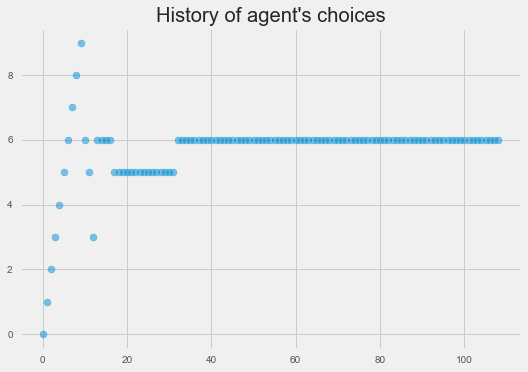

In [194]:
plt.scatter(np.arange(len(trials)), trials, alpha=.5)
plt.title('History of agent\'s choices')
plt.show()